In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install easyocr opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import easyocr
import time

# Initialize EasyOCR Reader with GPU support
reader = easyocr.Reader(['en'], gpu=True)  # Assuming English text; add other languages if needed.

# Load your video
cap = cv2.VideoCapture('/kaggle/input/jaishreeram/videoplayback.mp4')

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")
    exit()

frame_count = 0
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps_list = []

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            start_time = time.time()
            
            # Convert the image to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Perform OCR
            results = reader.readtext(frame_rgb)
            
            # Calculate FPS
            end_time = time.time()
            fps = 1 / (end_time - start_time)
            fps_list.append(fps)
            
            # Print results
            print(f"Frame {frame_count + 1}/{total_frames} - FPS: {fps:.2f}")
            for (bbox, text, prob) in results:
                print(f"Detected text: {text} with confidence {prob:.2f}")
            
            frame_count += 1
        else:
            break
except Exception as e:
    print(f"An error occurred: {str(e)}")
finally:
    # Release everything when job is finished
    cap.release()

# Calculate average FPS
average_fps = sum(fps_list) / len(fps_list) if fps_list else 0
print(f"Average FPS: {average_fps:.2f}")


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Frame 1/1504 - FPS: 0.80
Detected text: Sunroof with confidence 1.00
Detected text: someone with confidence 1.00
Frame 2/1504 - FPS: 9.78
Detected text: Sunroof with confidence 1.00
Detected text: someone with confidence 1.00
Frame 3/1504 - FPS: 9.96
Detected text: Sunroof with confidence 1.00
Detected text: someone with confidence 1.00
Frame 4/1504 - FPS: 15.64
Frame 5/1504 - FPS: 15.87
Detected text: Sunroot with confidence 0.24
Frame 6/1504 - FPS: 16.08
Detected text: Sunroof with confidence 0.79
Frame 7/1504 - FPS: 15.96
Detected text: Sunroof with confidence 0.92
Frame 8/1504 - FPS: 17.27
Detected text: Sunroof with confidence 0.93
Frame 9/1504 - FPS: 17.73
Detected text: Sunroof with confidence 0.96
Frame 10/1504 - FPS: 17.49
Detected text: Sunroof with confidence 1.00
Frame 11/1504 - FPS: 11.07
Detected text: Sunroof with confidence 1.00
Detected text: Nicky You"re & Dazy with confidence 0.84
Frame 12/1504 - FPS: 12.87
Detected text: Sunroof with confidence 1.00
Detected text: N

In [9]:
import cv2
import easyocr
import time

# Initialize EasyOCR Reader without GPU support (use CPU)
reader = easyocr.Reader(['en'], gpu=False)  # Assuming English text; add other languages if needed.

# Load your video
cap = cv2.VideoCapture('/kaggle/input/jaishreeram/videoplayback.mp4')

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")
    exit()

frame_count = 0
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps_list = []

# Start the total execution timer
start_time_total = time.time()

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            start_time = time.time()
            
            # Convert the image to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Perform OCR
            results = reader.readtext(frame_rgb)
            
            # Calculate FPS for the current frame
            end_time = time.time()
            fps = 1 / (end_time - start_time)
            fps_list.append(fps)
            
            # Print results for each frame
            print(f"Frame {frame_count + 1}/{total_frames} - FPS: {fps:.2f}")
            for (bbox, text, prob) in results:
                print(f"Detected text: {text} with confidence {prob:.2f}")
            
            frame_count += 1
        else:
            break
except Exception as e:
    print(f"An error occurred: {str(e)}")
finally:
    # Release everything when job is finished
    cap.release()

# Calculate average FPS
average_fps = sum(fps_list) / len(fps_list) if fps_list else 0
print(f"Average FPS: {average_fps:.2f}")

# Calculate and print total execution time
total_execution_time = time.time() - start_time_total
print(f"Total Execution Time: {total_execution_time:.2f} seconds")


Frame 1/1504 - FPS: 0.74
Detected text: Sunroof with confidence 1.00
Detected text: someone with confidence 1.00
Frame 2/1504 - FPS: 0.73
Detected text: Sunroof with confidence 1.00
Detected text: someone with confidence 1.00
Frame 3/1504 - FPS: 0.74
Detected text: Sunroof with confidence 1.00
Detected text: someone with confidence 1.00
Frame 4/1504 - FPS: 0.78
Frame 5/1504 - FPS: 0.76
Detected text: Sunroot with confidence 0.24
Frame 6/1504 - FPS: 0.78
Detected text: Sunroof with confidence 0.79
Frame 7/1504 - FPS: 0.79
Detected text: Sunroof with confidence 0.80
Frame 8/1504 - FPS: 0.54
Detected text: Sunroof with confidence 0.88
Frame 9/1504 - FPS: 0.67
Detected text: Sunroof with confidence 0.97
Frame 10/1504 - FPS: 0.77
Detected text: Sunroof with confidence 1.00
Frame 11/1504 - FPS: 0.74
Detected text: Sunroof with confidence 1.00
Detected text: Nicky You"re & Dazy with confidence 0.85
Frame 12/1504 - FPS: 0.75
Detected text: Sunroof with confidence 1.00
Detected text: Nicky You'

In [7]:
import cv2
import easyocr
import time
from concurrent.futures import ThreadPoolExecutor
import scenedetect
from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.detectors import ContentDetector


# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'], gpu=False)

def process_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = reader.readtext(frame_rgb)
    return results

def process_video_multithreading(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    start_time = time.time()
    with ThreadPoolExecutor(max_workers=4) as executor:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            executor.submit(process_frame, frame)
            frame_count += 1
    end_time = time.time()
    cap.release()
    return frame_count, end_time - start_time



def process_video_scene_detection(video_path):
    video_manager = VideoManager([video_path])
    scene_manager = SceneManager()
    scene_manager.add_detector(ContentDetector())
    video_manager.start()
    start_time = time.time()
    scene_list = scene_manager.detect_scenes(frame_source=video_manager)
    video_manager.release()
    end_time = time.time()
    return len(scene_list[0]), end_time - start_time

# Define your video path
video_path = '/kaggle/input/jaishreeram/videoplayback.mp4'




In [5]:
pip install scenedetect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Multithreading Test
frame_count_mt, time_mt = process_video_multithreading(video_path)
print(f"Multithreading: Processed {frame_count_mt} frames in {time_mt:.2f} seconds.")

In [17]:
import cv2
import easyocr
import time
from scenedetect import VideoManager, SceneManager
from scenedetect.detectors import ContentDetector

# Initialize EasyOCR Reader without GPU support (use CPU)
reader = easyocr.Reader(['en'], gpu=False)  # Assuming English text; add other languages if needed.

# Path to your video
video_path = '/kaggle/input/jaishreeram/videoplayback.mp4'

# Initialize VideoManager and SceneManager
video_manager = VideoManager([video_path])
scene_manager = SceneManager()
scene_manager.add_detector(ContentDetector(threshold=0.1))  # Adjust threshold for sensitivity

# Start video manager
video_manager.start()
scene_manager.detect_scenes(video_manager)

# Get list of scene boundaries (start and end frame numbers)
scene_list = scene_manager.get_scene_list()

print(f"Detected {len(scene_list)} scenes in the video.")

# Open video with OpenCV
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file")
    exit()

fps_list = []
frame_count = 0

try:
    for scene_start, scene_end in scene_list:
        # Ensure scene_start is an integer
        scene_start = int(scene_start)
        
        # Process only the first frame of each scene
        cap.set(cv2.CAP_PROP_POS_FRAMES, scene_start)
        ret, frame = cap.read()
        
        if not ret:
            continue

        start_time = time.time()
        
        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Perform OCR
        results = reader.readtext(frame_rgb)
        
        # Calculate FPS
        end_time = time.time()
        fps = 1 / (end_time - start_time)
        fps_list.append(fps)
        
        print(f"Processing scene starting at frame {scene_start}: FPS: {fps:.2f}")
        for (bbox, text, prob) in results:
            print(f"Detected text: {text} with confidence {prob:.2f}")
        
        frame_count += 1
except Exception as e:
    print(f"An error occurred: {str(e)}")
finally:
    cap.release()

# Calculate average FPS
average_fps = sum(fps_list) / len(fps_list) if fps_list else 0
print(f"Average FPS: {average_fps:.2f}")


Detected 43 scenes in the video.
Processing scene starting at frame 0: FPS: 0.71
Detected text: Sunroof with confidence 1.00
Detected text: someone with confidence 1.00
Processing scene starting at frame 135: FPS: 0.72
Detected text: LALALALALALALALALALALALALALA with confidence 1.00
Processing scene starting at frame 150: FPS: 0.69
Detected text: LALALALALALALALALALALALALALA with confidence 1.00
Processing scene starting at frame 180: FPS: 0.73
Detected text: LALALALALALA with confidence 1.00
Processing scene starting at frame 210: FPS: 0.74
Detected text: LALALALALALA with confidence 1.00
Processing scene starting at frame 233: FPS: 0.74
Detected text: Igot my head out the sunroof with confidence 0.93
Processing scene starting at frame 267: FPS: 0.69
Detected text: Igot my head out the sunroof with confidence 0.83
Processing scene starting at frame 291: FPS: 0.73
Detected text: Fm with confidence 0.81
Detected text: blasting our favorite tunes with confidence 0.83
Processing scene sta

In [18]:
import cv2
import easyocr
import time

# Initialize EasyOCR Reader with GPU support
reader = easyocr.Reader(['en'], gpu=True)

# Load video
cap = cv2.VideoCapture('/kaggle/input/jaishreeram/videoplayback.mp4')
if not cap.isOpened():
    print("Error opening video file")
    exit()

start_time = time.time()  # Start timing
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform OCR
    results = reader.readtext(frame_rgb)

    frame_count += 1

cap.release()
total_time_gpu = time.time() - start_time  # End timing
print(f"GPU OCR Total Execution Time: {total_time_gpu:.2f} seconds")


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


GPU OCR Total Execution Time: 107.94 seconds


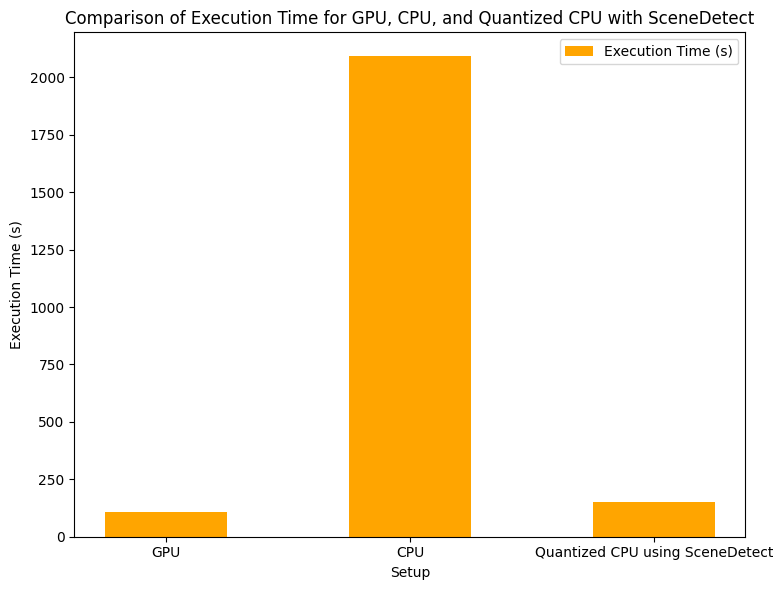

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data for execution time comparison
labels = ['GPU', 'CPU', 'Quantized CPU using SceneDetect']
execution_time = [107.94, 2091.34, 151.40]  # Execution time in seconds for each setup

# Create an index for the bars
x = np.arange(len(labels))

# Width of the bars
bar_width = 0.5

# Create the figure and axis for the execution time graph
fig, ax = plt.subplots(figsize=(8, 6))

# Create bars for execution time
ax.bar(x, execution_time, bar_width, color='orange', label='Execution Time (s)')

# Add labels, title, and legend
ax.set_xlabel('Setup')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Comparison of Execution Time for GPU, CPU, and Quantized CPU with SceneDetect')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


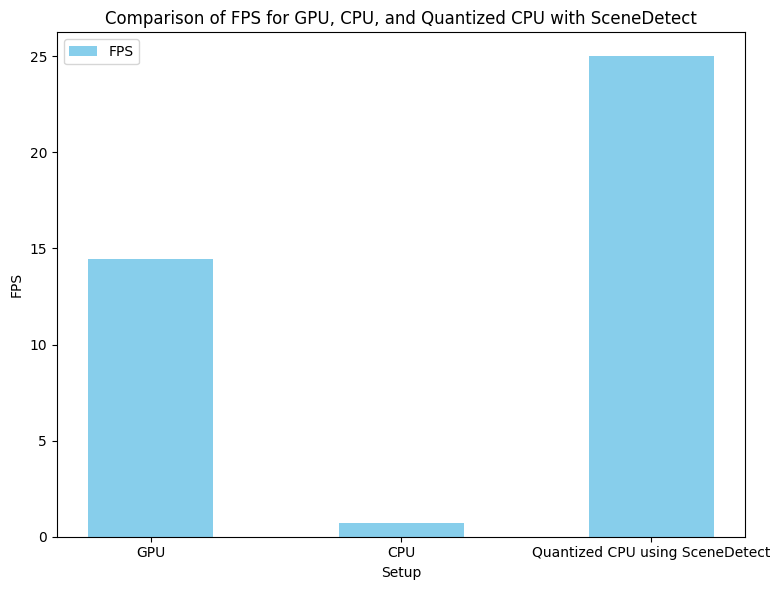

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data for FPS comparison
labels = ['GPU', 'CPU', 'Quantized CPU using SceneDetect']
fps_values = [14.46, 0.73, 25.00]  # FPS for each setup

# Create an index for the bars
x = np.arange(len(labels))

# Width of the bars
bar_width = 0.5

# Create the figure and axis for the FPS graph
fig, ax = plt.subplots(figsize=(8, 6))

# Create bars for FPS
ax.bar(x, fps_values, bar_width, color='skyblue', label='FPS')

# Add labels, title, and legend
ax.set_xlabel('Setup')
ax.set_ylabel('FPS')
ax.set_title('Comparison of FPS for GPU, CPU, and Quantized CPU with SceneDetect')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
